DATA 620 Project 1 (Week 5)
Lin Li and Tony Mai

1. Identify and load a network dataset that has some categorical information available for each node.
2. For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
3. Compare your centrality measures across your categorical groups.

In [1]:
from operator import itemgetter 
import numpy as np
import pandas as pd
import networkx as nx
import random
from matplotlib import pyplot as plt

In [2]:
# load gml file of coappearances of characters in Victor Hugo's novel "Les Miserables"
G = nx.read_gml('lesmis.gml', label='label')

In [3]:
# observe network info
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974


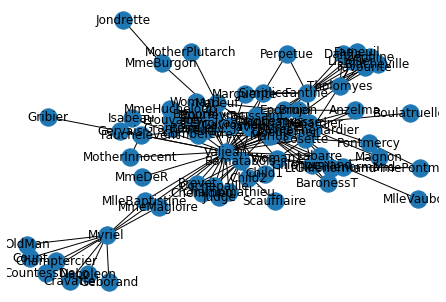

In [4]:
# graph newwork
nx.draw(G, with_labels = True)
plt.show(G)

In [5]:
# explore nodes 
nodes = list(G.nodes(data=True))
nodes[:10]

[('Myriel', {'gender': 'male'}),
 ('Napoleon', {'gender': 'male'}),
 ('MlleBaptistine', {'gender': 'female'}),
 ('MmeMagloire', {'gender': 'female'}),
 ('CountessDeLo', {'gender': 'male'}),
 ('Geborand', {'gender': 'male'}),
 ('Champtercier', {'gender': 'male'}),
 ('Cravatte', {'gender': 'male'}),
 ('Count', {'gender': 'male'}),
 ('OldMan', {'gender': 'male'})]

In [26]:
# calculate degree centrality of each node
degree_centrality = nx.degree_centrality(G)

# convert dictionary to dataframe
pd.set_option("display.precision", 18)
df_degree_centrality = pd.DataFrame.from_dict(degree_centrality, orient='index')

# sort and get top 10 degree centrality values
sort_degree_centrality = df_degree_centrality.sort_values(by=[0],ascending=False)
sort_degree_centrality.head(10)

,0
Valjean,0.473684210526315763
Gavroche,0.289473684210526327
Marius,0.250000000000000000
Javert,0.223684210526315763
Thenardier,0.210526315789473673
Fantine,0.197368421052631582
Enjolras,0.197368421052631582
Bossuet,0.171052631578947345
Courfeyrac,0.171052631578947345
Joly,0.157894736842105254


In [27]:
# calculate eigenvector centrality of each node
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight=None)
#eigenvector_centrality
# convert dictionary to dataframe
df_eigenvector_centrality = pd.DataFrame.from_dict(eigenvector_centrality, orient='index')

# get top 10 eigenvector centrality values
sort_eigenvector_centrality = df_eigenvector_centrality.sort_values(by=[0],ascending=False)
sort_eigenvector_centrality.head(10)

,0
Gavroche,0.317838939774976736
Valjean,0.267618175988539320
Enjolras,0.267178632823566631
Marius,0.259111145341787530
Bossuet,0.242130786374741336
Courfeyrac,0.232467197170214052
Bahorel,0.221553609261199630
Joly,0.221553609261199630
Feuilly,0.210734574881156156
Combeferre,0.210734574881156156


In [28]:
# select nodes gender = male
nodes_male = [n for n,v in G.nodes(data=True) if v['gender'] == 'male']  
print (nodes_male)

['Myriel', 'Napoleon', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'Valjean', 'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Thenardier', 'Javert', 'Fauchelevent', 'Bamatabois', 'Scaufflaire', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Gribier', 'Gavroche', 'Gillenormand', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Brujon', 'MmeHucheloup']


In [29]:
# select nodes gender = female
nodes_female = [n for n,v in G.nodes(data=True) if v['gender'] == 'female']  
print (nodes_female)

['MlleBaptistine', 'MmeMagloire', 'Marguerite', 'MmeDeR', 'Isabeau', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Cosette', 'Perpetue', 'Simplice', 'Woman1', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Jondrette', 'MmeBurgon', 'Magnon', 'MotherPlutarch', 'Toussaint', 'Child1', 'Child2']


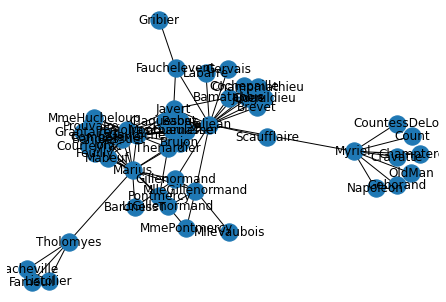

In [10]:
# graph coappearances of male characters
H_male = G.subgraph(selected_nodes_male)
nx.draw(H_male,with_labels=True)
plt.show(H_male)

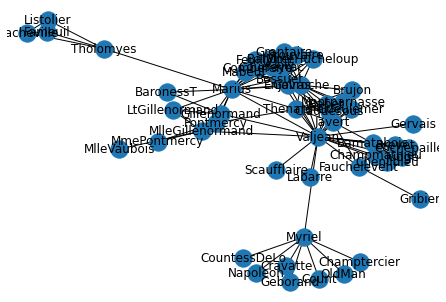

In [11]:
## graph coappearances of female characters
H_female = G.subgraph(selected_nodes_male)
nx.draw(H_female,with_labels=True)
plt.show(H_female)

In [12]:
# group centrality for female characters
nx.group_degree_centrality(G, selected_nodes_female)

0.43137254901960786

In [13]:
# group centrality for male characters
nx.group_degree_centrality(G, selected_nodes_male)

0.9230769230769231